# NMR Factor analysis
Replication of 
*Jain, V., Minh, C. C., Heaton, N., Ferraris, P., Ortenzi, L., & Ribeiro, M. T. (2013, January 1). Characterization of Underlying Pore and Fluid Structure Using Factor Analysis on NMR Data. Society of Petrophysicists and Well-Log Analysts.*
## Loading and viewing the data

In [1]:
import lasio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = lasio.read("R-540_NMR.las").df().dropna()
df.describe()

LAS spec version is 3.0 -- neither 1.2 nor 2


,T2DIST_DI_CMR[0],T2DIST_DI_CMR[1],T2DIST_DI_CMR[2],T2DIST_DI_CMR[3],T2DIST_DI_CMR[4],T2DIST_DI_CMR[5],T2DIST_DI_CMR[6],T2DIST_DI_CMR[7],T2DIST_DI_CMR[8],T2DIST_DI_CMR[9],...,T2DIST_DI_CMR[54],T2DIST_DI_CMR[55],T2DIST_DI_CMR[56],T2DIST_DI_CMR[57],T2DIST_DI_CMR[58],T2DIST_DI_CMR[59],T2DIST_DI_CMR[60],T2DIST_DI_CMR[61],T2DIST_DI_CMR[62],T2DIST_DI_CMR[63]
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,...,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,0.000835,0.000890,0.000910,0.000900,0.000867,0.000831,0.000812,0.000832,0.000868,0.000890,...,0.001577,0.001397,0.001252,0.001144,0.001078,0.001040,0.001017,0.001024,0.001144,0.001559
std,0.001656,0.001795,0.001870,0.001885,0.001860,0.001823,0.001819,0.001861,0.001935,0.001994,...,0.002882,0.002619,0.002397,0.002216,0.002076,0.001977,0.001910,0.001875,0.002063,0.004487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000044,0.000134
75%,0.001019,0.001093,0.001145,0.001115,0.001143,0.001101,0.000998,0.001063,0.001163,0.001136,...,0.001787,0.001443,0.001250,0.001099,0.001102,0.001095,0.001130,0.001228,0.001397,0.001806
max,0.012909,0.014342,0.015693,0.016455,0.016569,0.016245,0.016757,0.017733,0.018616,0.019078,...,0.015088,0.012975,0.011932,0.012398,0.012861,0.013059,0.012948,0.012518,0.019735,0.097010


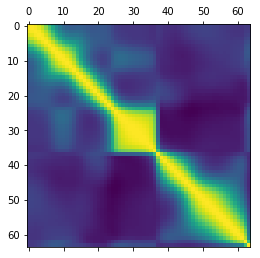

In [14]:
plt.matshow(df.corr());

## Principal Component Analysis

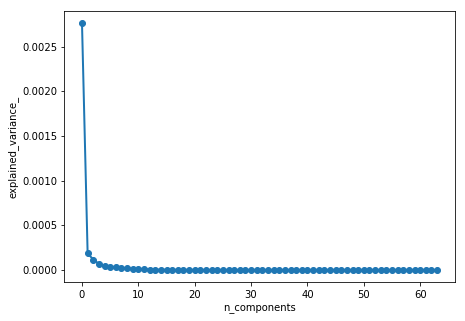

In [4]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(df)

plt.figure(1, figsize=(7, 5))
plt.plot(pca.explained_variance_, linewidth=2, marker='o')
plt.xlabel('n_components')
plt.ylabel('explained_variance_');

## Factor Analysis

In [5]:
fa = decomposition.FactorAnalysis(n_components=8)  # n=8 as per paper
fa.fit(df)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=8,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [6]:
factors = np.transpose(fa.components_)

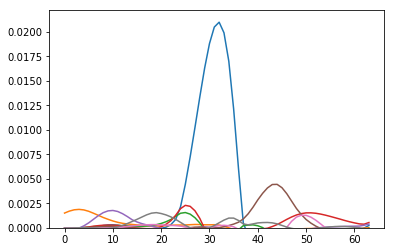

In [7]:
plt.plot(factors)
plt.ylim(ymin=0);

In [8]:
weights = factors.max(axis=0)

In [9]:
weights

array([ 0.02098906,  0.00188015,  0.00155745,  0.00229156,  0.00176948,
        0.00443477,  0.00128293,  0.0015493 ])

In [10]:
factors_norm = factors/weights

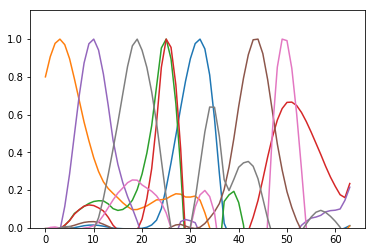

In [11]:
plt.plot(factors_norm)
plt.ylim(ymin=0);

Note that only the peaks are shown here. Some lines are mostly negative.

## Gaussian fitting

In [44]:
initial_means = factors.argmax(axis=0)

In [45]:
initial_means[0]

32

In [46]:
factors[:,0]

array([ -1.15235483e-04,  -1.19992524e-04,  -1.20273883e-04,
        -1.16761448e-04,  -1.01555340e-04,  -6.20708990e-05,
         1.68545345e-05,   1.22070379e-04,   2.30700292e-04,
         2.94984986e-04,   3.06546406e-04,   2.68036300e-04,
         1.79884886e-04,   7.12107494e-05,  -2.98311364e-05,
        -6.64880966e-05,  -1.01533242e-04,  -1.15068147e-04,
        -1.20120567e-04,  -1.06716245e-04,  -5.62868875e-05,
         6.11391791e-05,   3.16065921e-04,   8.50297467e-04,
         2.12981677e-03,   4.43994428e-03,   7.23170902e-03,
         1.02585445e-02,   1.33606338e-02,   1.63085464e-02,
         1.88050409e-02,   2.04934592e-02,   2.09890627e-02,
         1.99098206e-02,   1.70091304e-02,   1.21357866e-02,
         6.08836697e-03,   4.97463082e-04,  -7.95690008e-04,
        -8.86047206e-04,  -9.51487292e-04,  -1.00667306e-03,
        -1.04294421e-03,  -1.06144408e-03,  -1.05572604e-03,
        -1.02780222e-03,  -9.79900794e-04,  -9.16314886e-04,
        -8.51927845e-04,

In [24]:
from sklearn.mixture import GaussianMixture

In [55]:
gm = GaussianMixture(n_components=2)
gm.fit(data.reshape(-1, 1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [56]:
gm.means_

array([[ 1.5094063 ],
       [ 3.77815125]])

In [57]:
gm.covariances_

array([[[  4.26133642e-02]],

       [[  1.00000000e-06]]])